In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming

In [2]:
def computeST(profiles, reference, centralGenotypes):
    profiles = profiles.copy()
    allMatches = {}
    for nMatch in range(7, 3, -1):
        for CG in centralGenotypes:
            matchingST = profiles.eq(reference.loc[CG]).sum(axis=1)
            for ST in matchingST[matchingST == nMatch].index:
                if ST not in allMatches:
                    allMatches[ST] = str(CG)
    return pd.Series(allMatches, name='clonal_complex')

In [3]:
profiles = pd.read_csv(
    'MLST_assighnment.tsv', sep='\t').set_index('ST').drop('clonal_complex', axis=1)

centralGenotypes = pd.read_csv(
        'cj_complexes', usecols=[0], names=['ST'], sep='\t').squeeze()

reference = profiles.loc[profiles.index.isin(centralGenotypes)]

originalClassification = pd.DataFrame(computeST(profiles, reference, centralGenotypes))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


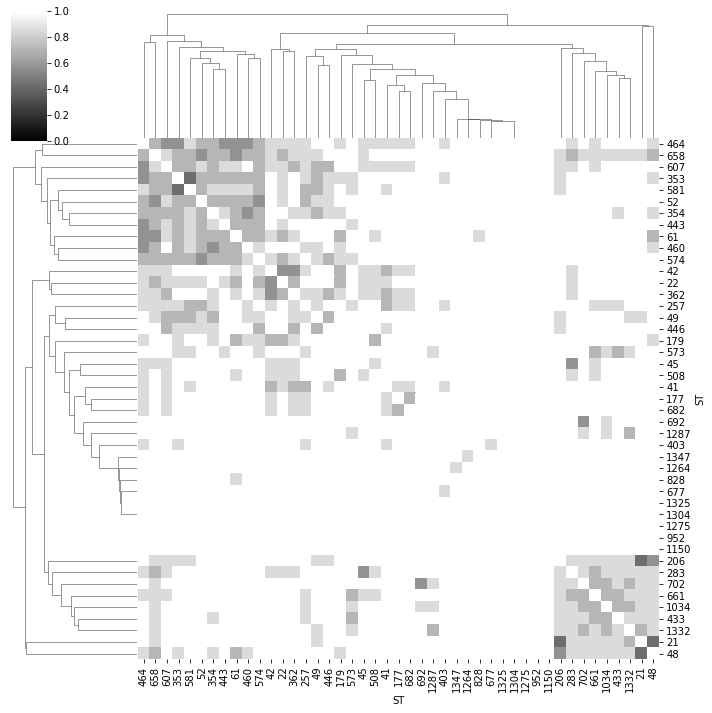

In [4]:
sns.clustermap(
    reference.T.corr(method=hamming), cmap='binary_r',
    vmin=0, vmax=1, square=True, xticklabels=1, yticklabels=1)

In [5]:
STassignments = {}
nReps = 200
for x in range(nReps):
    shuffleCG = centralGenotypes.sample(len(centralGenotypes))
    STassignments[x] = computeST(profiles, reference, shuffleCG)
STassignments = pd.DataFrame(STassignments)

mode = STassignments.mode(axis=1)[0]
modeFrequency = STassignments.eq(mode.values, axis=0).sum(axis=1) / nReps
STobserved = STassignments.apply(lambda x: tuple(set(x)), axis=1)

samplingData = pd.concat([mode, modeFrequency, STobserved], axis=1)
samplingData.columns = ['Mode', 'Mode Frequency', 'observed']

In [6]:
df = pd.merge(profiles, samplingData, left_index=True, right_index=True)
df = pd.merge(df, originalClassification, left_index=True, right_index=True)

In [7]:
df.sort_values('Mode Frequency',ascending=True).head(50)

,aspA,glnA,gltA,glyA,pgm,tkt,uncA,Mode,Mode Frequency,observed,clonal_complex
2951,7,4,2,2,11,3,6,61,0.220,"(61, 658, 574, 354, 353)",61
6473,8,30,2,2,10,3,6,354,0.265,"(354, 353, 460, 464)",353
6888,7,2,5,10,11,3,6,353,0.275,"(574, 581, 353, 607)",353
3920,24,17,2,2,2,3,6,353,0.275,"(443, 353, 460, 464)",353
10937,8,17,2,2,22,3,6,353,0.335,"(353, 354, 52)",353
2141,9,2,2,2,11,3,6,354,0.340,"(354, 52, 464)",52
3897,7,17,2,2,11,3,1,353,0.340,"(574, 353, 464)",353
8334,8,17,2,2,10,59,6,354,0.345,"(354, 353, 460)",353
8133,8,17,2,2,89,3,6,354,0.345,"(354, 353, 460)",353
1036,7,84,5,10,11,3,6,353,0.350,"(574, 581, 353)",353


In [717]:
df.groupby('clonal_complex')['Mode Frequency'].mean().sort_values()

clonal_complex
206     0.899662
353     0.904442
52      0.927774
21      0.940418
61      0.949275
607     0.955692
433     0.962368
45      0.964349
362     0.971471
354     0.977073
177     0.979796
574     0.981880
702     0.982407
446     0.982692
49      0.982885
48      0.982976
42      0.983822
460     0.984286
692     0.985349
443     0.986276
22      0.989511
257     0.990447
658     0.993467
581     1.000000
661     1.000000
573     1.000000
677     1.000000
508     1.000000
682     1.000000
1034    1.000000
828     1.000000
41      1.000000
403     1.000000
283     1.000000
179     1.000000
1347    1.000000
1332    1.000000
1325    1.000000
1304    1.000000
1287    1.000000
1275    1.000000
1264    1.000000
1150    1.000000
464     1.000000
952     1.000000
Name: Mode Frequency, dtype: float64